In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats

In [5]:
df = pd.read_csv("concrete_data.csv")
x_train,x_test,y_train,y_test = train_test_split(df.drop("Strength",axis=1),df["Strength"],test_size=0.2,random_state=42)

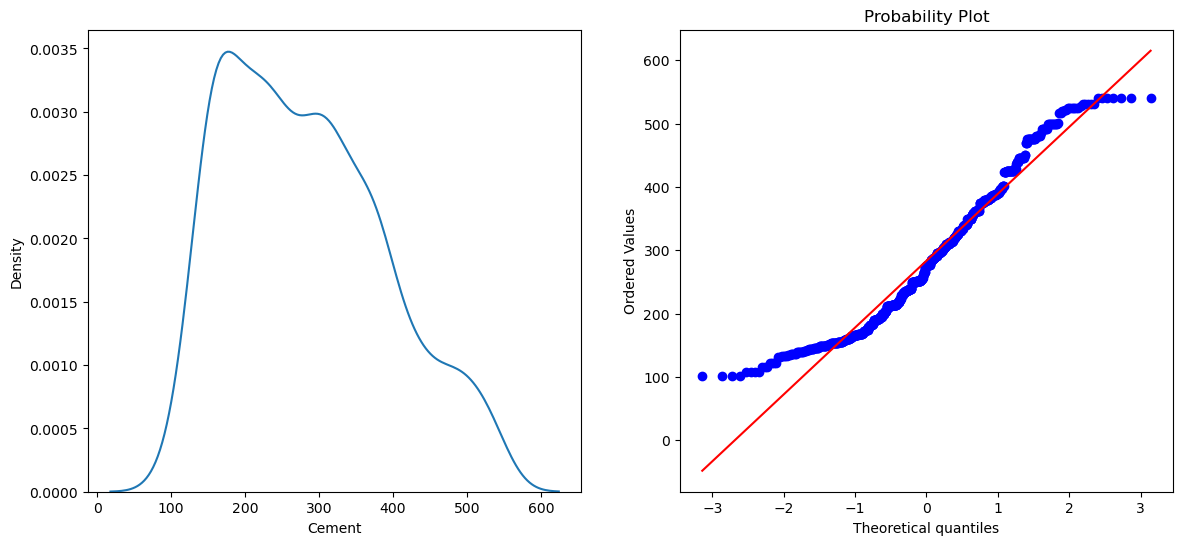

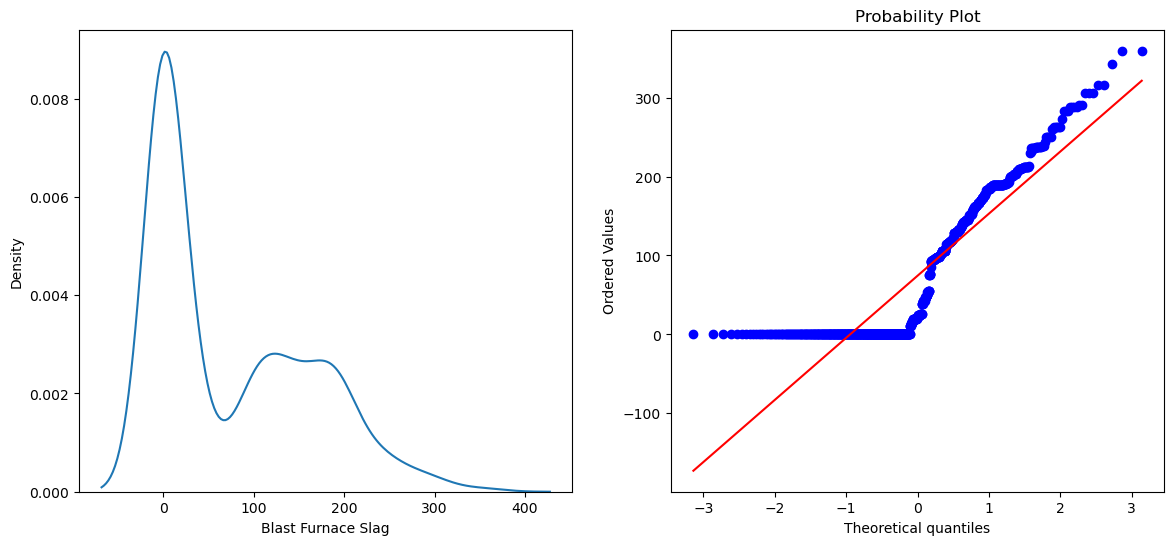

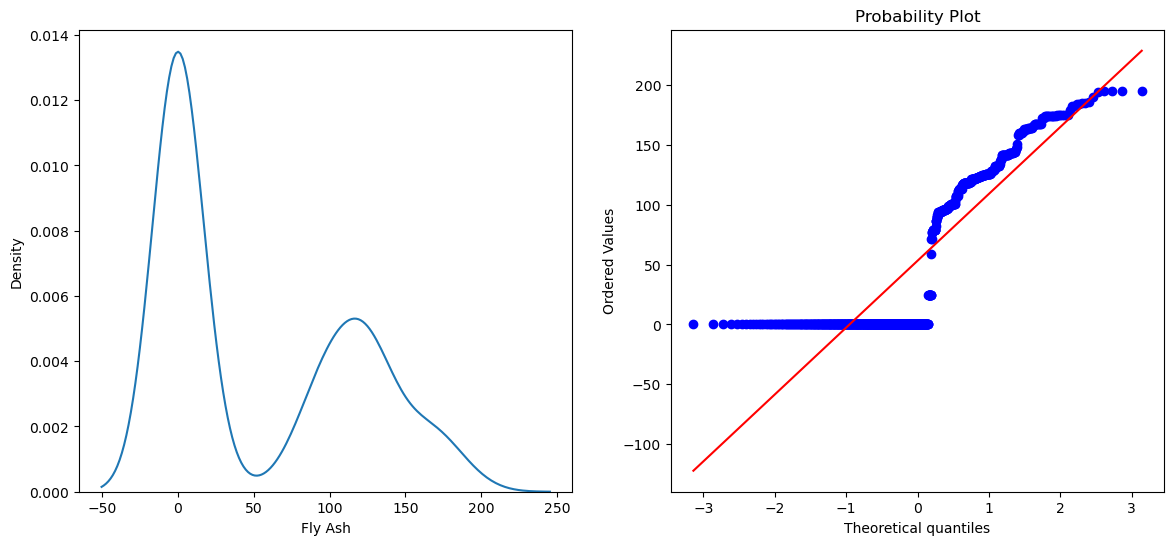

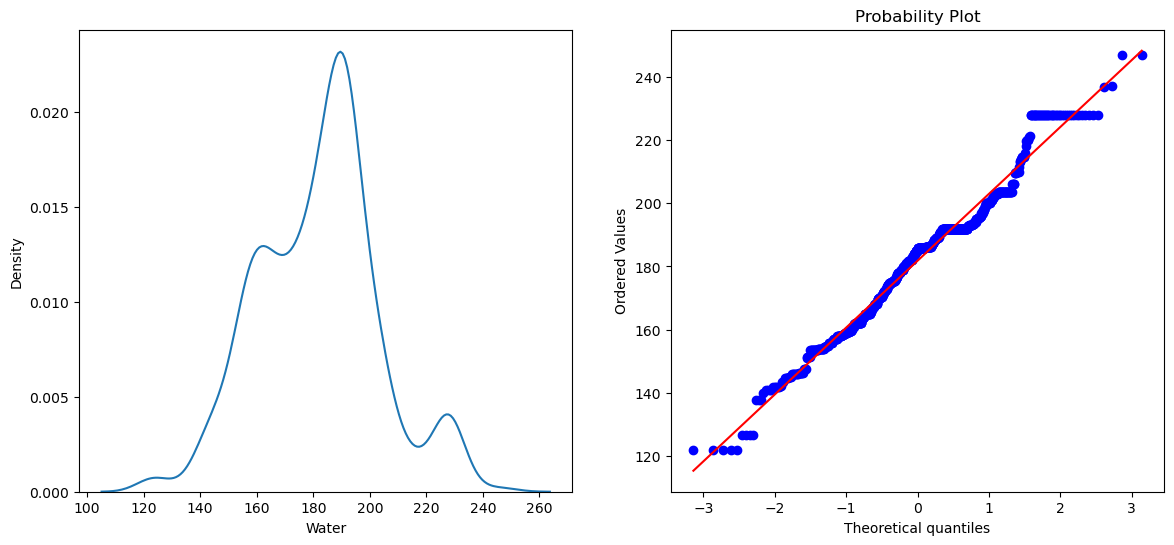

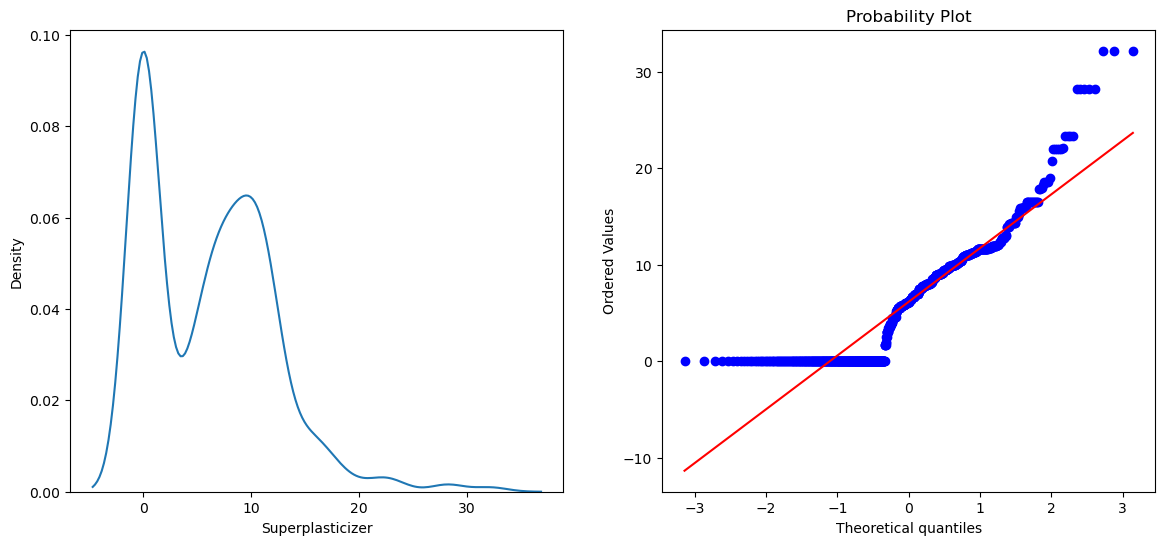

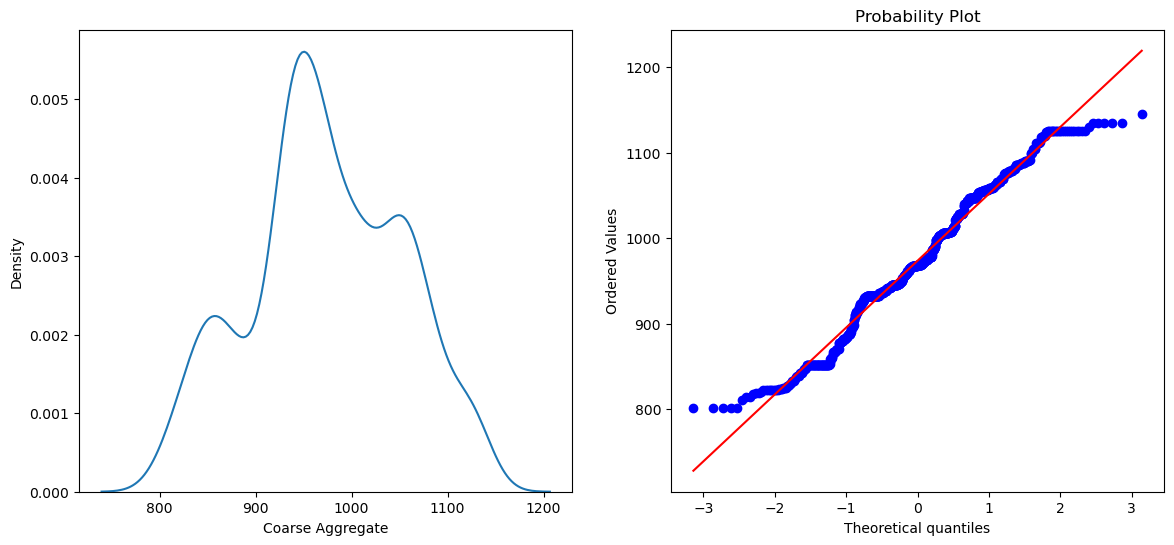

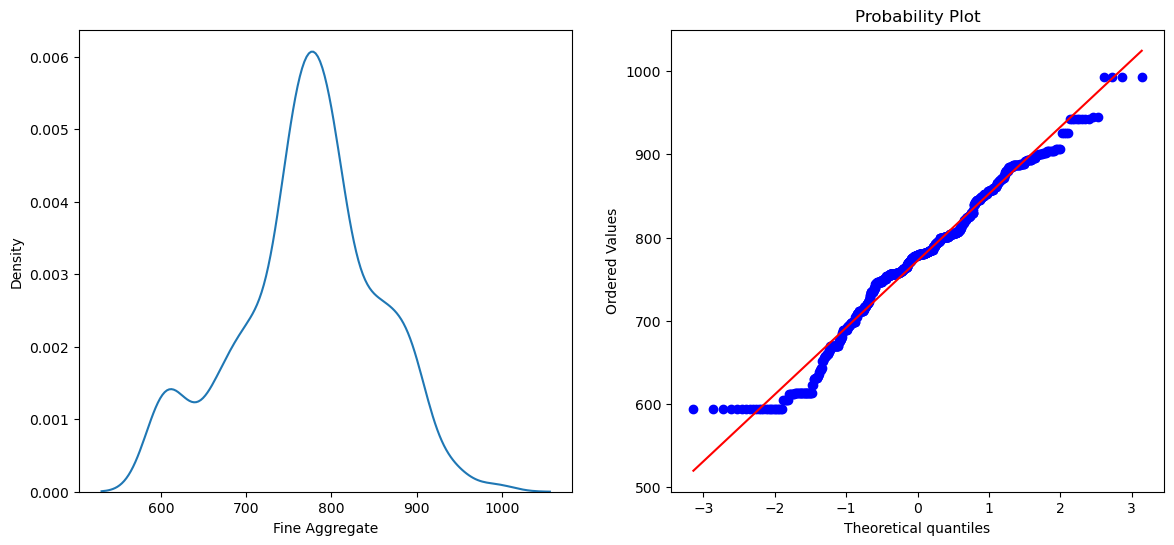

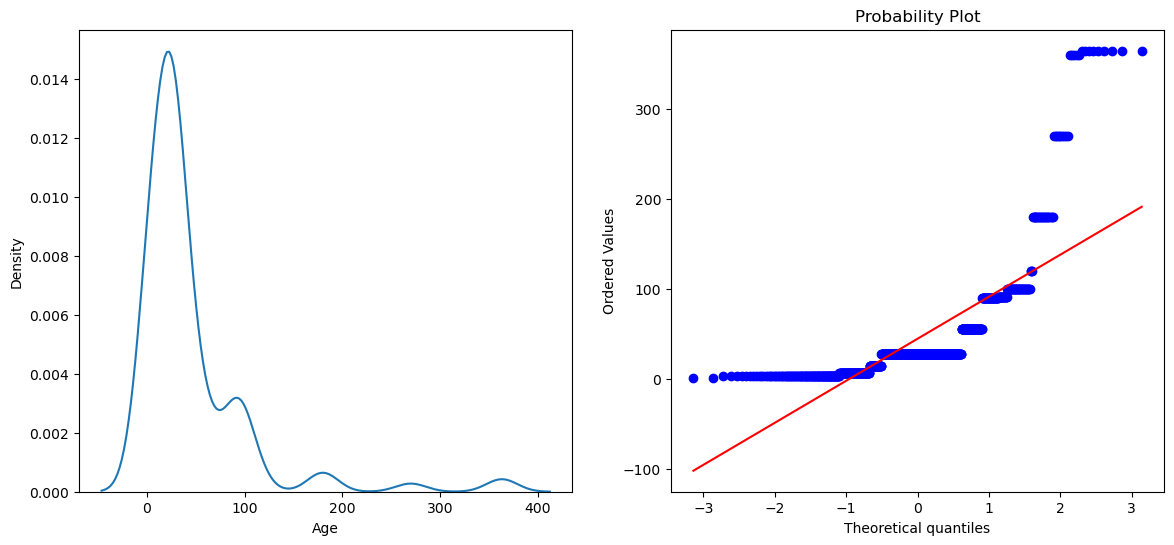

In [9]:
for v in x_train.columns:
    fig,[ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
    sns.kdeplot(x_train[v],ax=ax1)
    stats.probplot(x_train[v],plot=ax2)

<h3>Making a function to perform power transforme</h3>

In [24]:
def transformer(t):
    trs = PowerTransformer(method=t)
    x_train_t = pd.DataFrame(trs.fit_transform(x_train), columns=x_train.columns)
    x_test_t = pd.DataFrame(trs.transform(x_test), columns=x_train.columns)

    for v in x_train.columns:
        fig,[ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
        sns.kdeplot(x_train[v],ax=ax1)
        sns.kdeplot(x_train_t[v],ax=ax2)
    

<h3>Box-Cox</h3>
=> It does not accept the negative(-) values 

In [22]:
transformer('box-cox')

ValueError: The Box-Cox transformation can only be applied to strictly positive data

<h3>yeo-johnson</h3>
=> Here it find the suitable power for value to center the skew

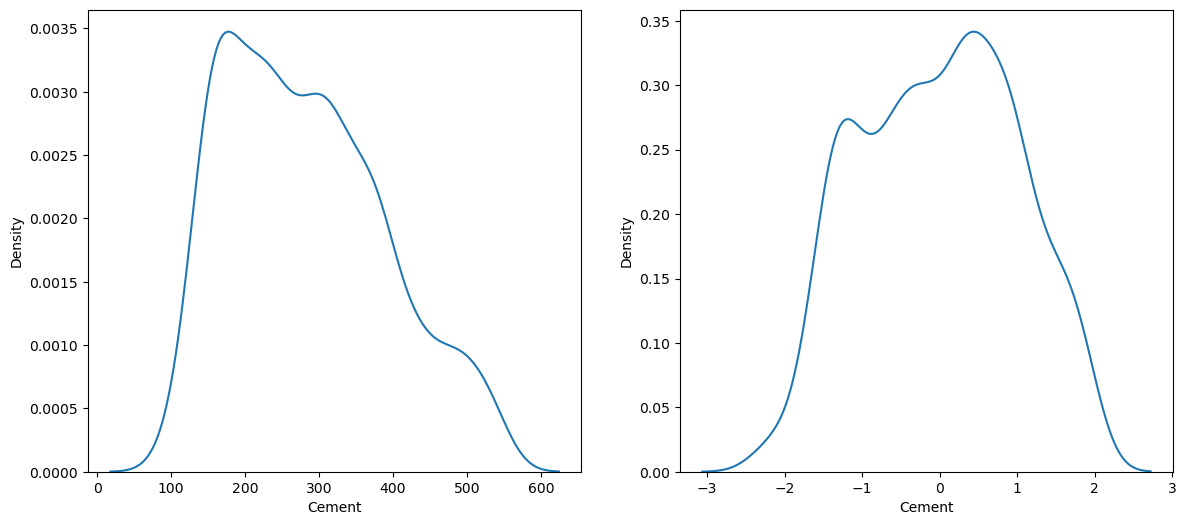

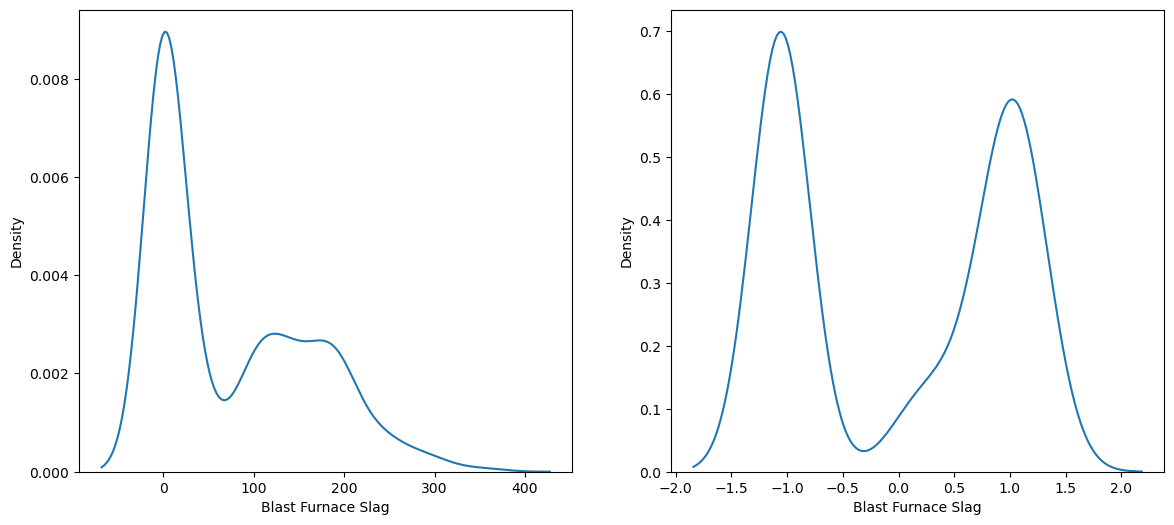

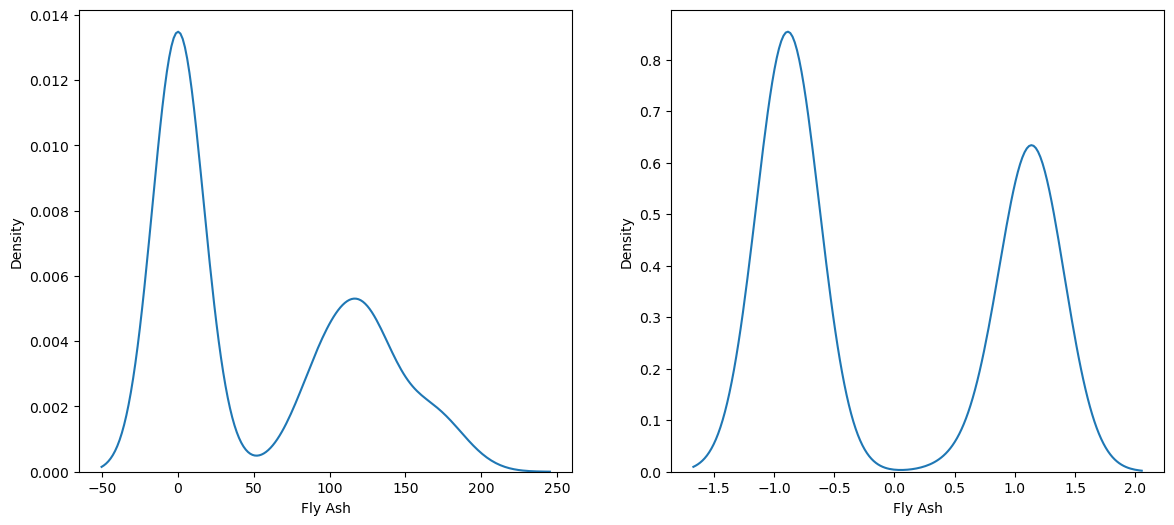

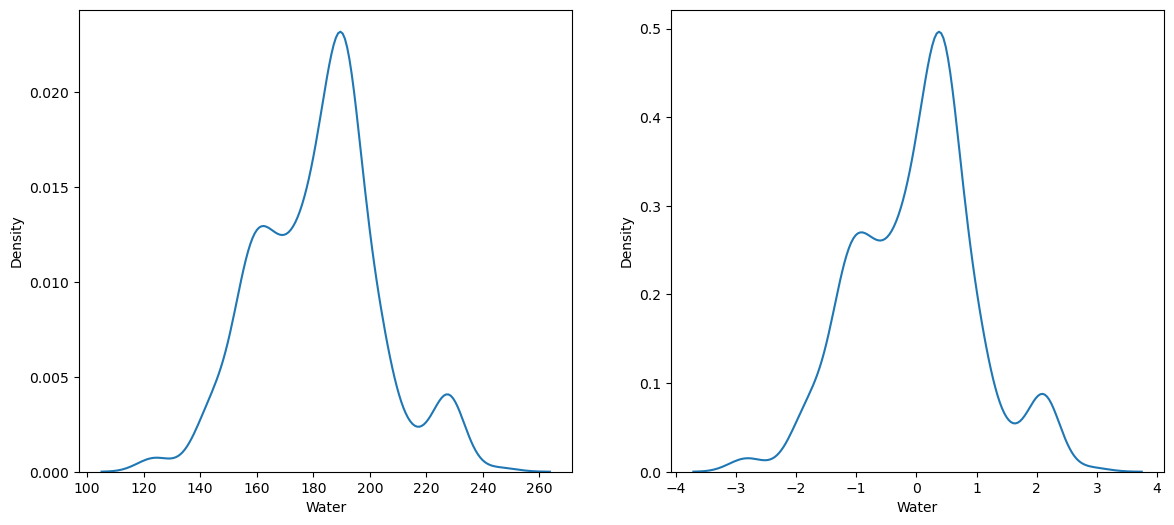

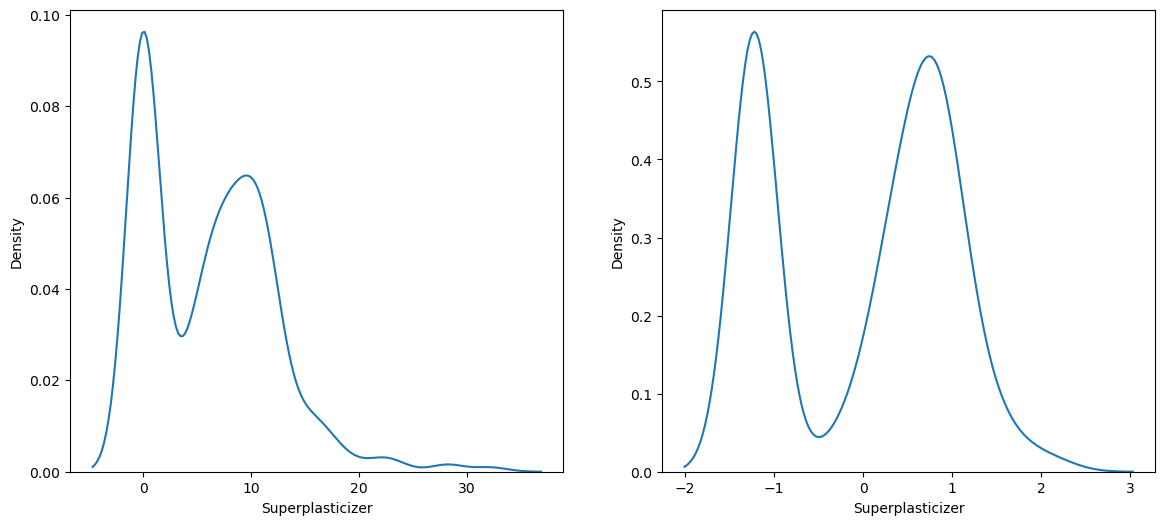

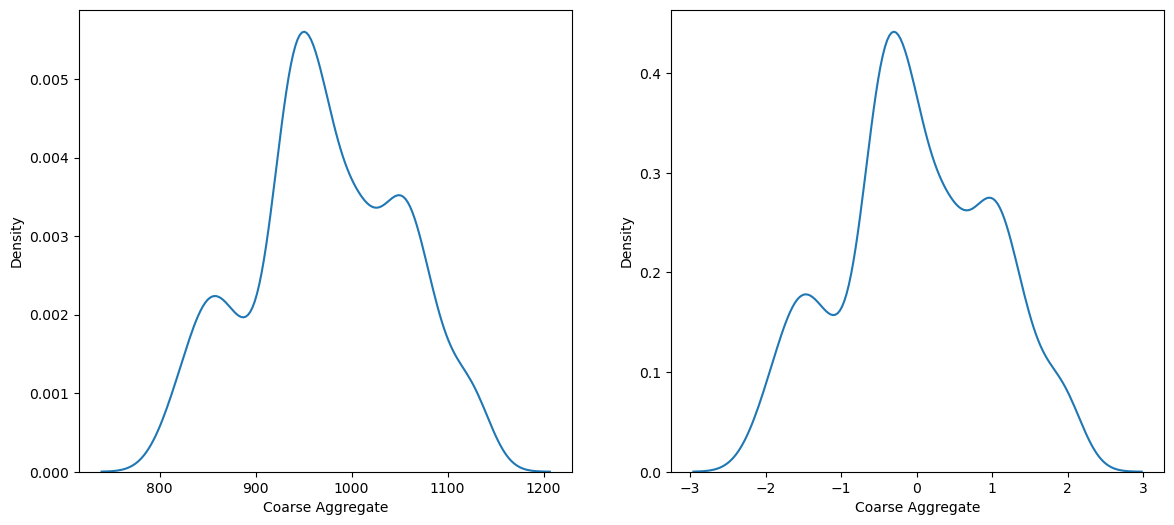

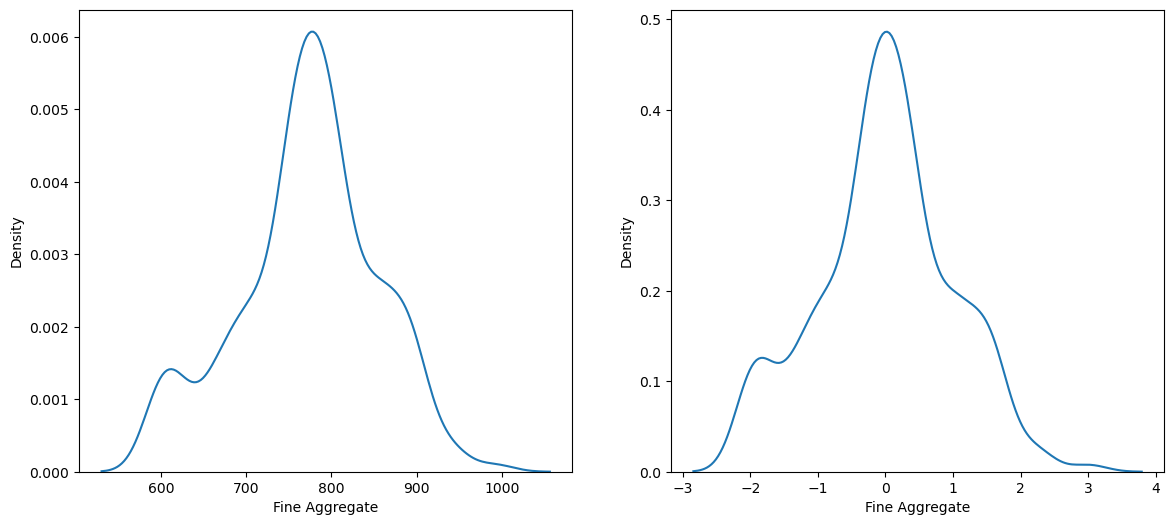

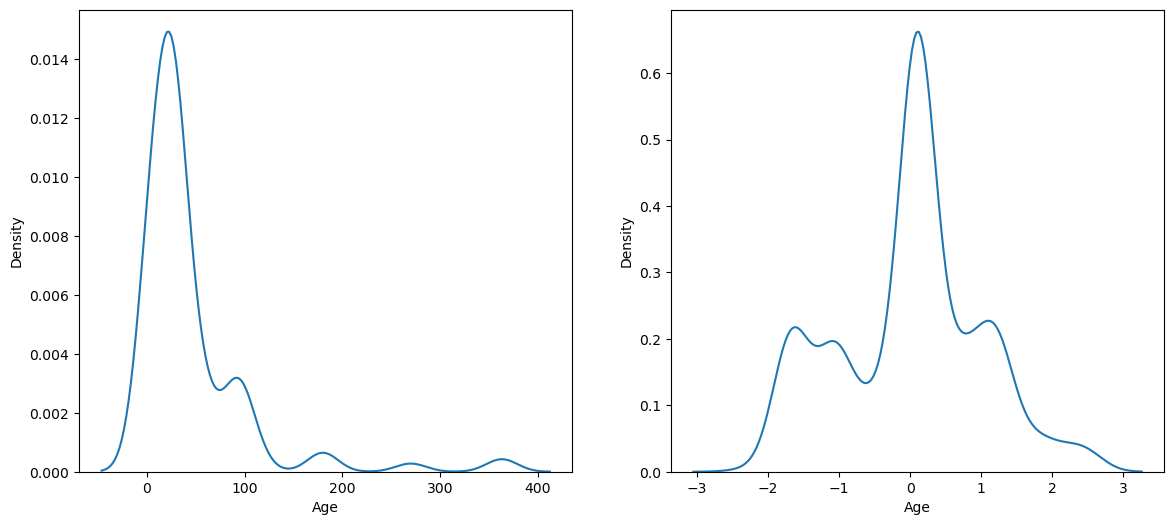

In [25]:
transformer('yeo-johnson')